In [2]:
import tensorflow as tf

In [3]:
yoga=tf.constant('yoga world')

In [4]:
type(yoga)

tensorflow.python.framework.ops.Tensor

In [5]:
x=tf.constant(100)

In [6]:
type(x)

tensorflow.python.framework.ops.Tensor

In [7]:
sess = tf.Session()

In [8]:
sess.run(yoga)
#b = indication

b'yoga world'

In [9]:
type(sess.run(x))

numpy.int32

In [11]:
##operations
x = tf.constant(2)

In [12]:
y= tf.constant(3)

In [13]:
with tf.Session() as sess:
    print('Operations with Constants')
    print('Addition: ',sess.run(x+y))
    print('Subtraction:', sess.run(x-y))
    print('Multiplication:',sess.run(x*y))
    print('Division:',sess.run(x/y))

Operations with Constants
Addition:  5
Subtraction: -1
Multiplication: 6
Division: 0.6666666666666666


In [10]:
x = tf.placeholder(tf.float64)

In [11]:
y = tf.placeholder(tf.float64)

In [76]:
x


<tf.Tensor 'Placeholder_6:0' shape=<unknown> dtype=float64>

In [12]:
add = tf.add(x,y)

In [54]:
type(add)

tensorflow.python.framework.ops.Tensor

In [13]:
sub = tf.subtract(x,y)
mul = tf.multiply(x,y)

In [14]:
d = {x:20, y:30}

In [32]:
with tf.Session() as sess:
    print('Operations with Placeholders')
    print('addition',sess.run(add,feed_dict=d))

Operations with Placeholders
addition 50.0


In [16]:
import numpy as np

In [17]:
a = np.array([[5.0,5.0]])
b = np.array([[2.0],[2.0]])

In [20]:
mat1 = tf.constant(a)

In [21]:
mat2 = tf.constant(b)

In [33]:
matrix_multi = tf.matmul(mat1,mat2)

In [35]:
with tf.Session() as sess:
    result = sess.run(matrix_multi)
    print(result)

[[20.]]


In [36]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [37]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [39]:
mnist.train.images.shape
#55000 images, 784 pixels

(55000, 784)

In [40]:
mnist.train.num_examples

55000

In [41]:
mnist.test.num_examples

10000

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
mnist.train.images[1].shape
##need to be reshaped as (28,28) to see image

(784,)

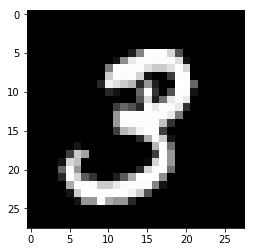

In [47]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')

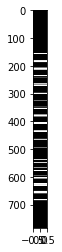

In [48]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

In [50]:
#break down batches
x = tf.placeholder(tf.float32,shape=[None,784])

In [52]:
#weights
#784 pixels and 10 possible labels
W = tf.Variable(tf.zeros([784,10]))

In [53]:
#setup bias
b = tf.Variable(tf.zeros([10]))

In [54]:
#NN function formula
y=tf.matmul(x,W)+ b
#prediction

In [56]:
#passing true labels
y_true =tf.placeholder(tf.float32,shape=[None,10])
#why None and 10 
# 10 : possible label. so if index is 1, that number is true

In [57]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))
# this minimizes error between y_true and y
#define the error

In [58]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
# less learning rate : more accurate but slower
#reduce the error

In [59]:
train = optimizer.minimize(cross_entropy)
#grab the error and minimize it 

In [60]:
init = tf.glorot_normal_initializer()

In [69]:
with tf.Session() as sess:
    sess.run(init)   
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(1000)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        #x and y defied as place_holder until passing it as dictionary
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    print(sess.run(acc,feed_dict ={x: mnist.test.images,y_true:mnist.test.labels}))

TypeError: Fetch argument <tensorflow.python.ops.init_ops.VarianceScaling object at 0x13c1e26a0> has invalid type <class 'tensorflow.python.ops.init_ops.VarianceScaling'>, must be a string or Tensor. (Can not convert a VarianceScaling into a Tensor or Operation.)

In [70]:
##Tensor Flow estimators
import pandas as pd
import seaborn as sns
iris = sns.load_dataset('iris')

In [72]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
